In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Problem Statement

To perform analysis on treadmills and customers using their characteristics for better recommendation of treadmill products to the potential customers and suggesting the treadmills. Analysing customer profiles and their requirment and target the customer requirments; investigate the difference in usage with the customer profiles.

In [2]:
df = pd.read_csv("treadmill.csv")
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [3]:
df.shape

(180, 9)

The dataframe has 180 data points with 9 columns / attributes / features.

In [4]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [5]:
df.describe(include = "all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


Age : The mean age is 28 for the users and the min age of users is 18, while max is 50 years.

Education: The mean education is 15 , while min is 12, max is 21. 

Usage: The usage is ranging from 2 to 7 with mean 3.4hrs, median-3.

Fitness: The mean fitness score is 3.3 which is same around median of 3.0 and max 5.

Income: The average income of users is 53,719, which is near to median income i.e 50,596. The min income is 29,562 , max income is 1,04,581.

Miles: The miles range from 21 to 360 which is large data range with mean of 103, median of 94.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


The attributes Product, Gender, MaritialStatus are object type / categorical data types.

The attributes Age, Education, Usage, Fitness, Incomes, Miles are integer / numerical data types.

In [7]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

No duplicate values in the dataset

In [8]:
# Since the column "Usage" contains the average hours of usage of the treadmill. Converting it to 5 different categories.
bins = [2, 3, 4, 5, 6, 7]
labels = ["Very Less", "Less", "Moderate", "High", "Very High"]
df["Usage"] = pd.cut(x = df["Usage"], bins = bins, labels = labels, include_lowest = True)
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,Very Less,4,29562,112
1,KP281,19,Male,15,Single,Very Less,3,31836,75
2,KP281,19,Female,14,Partnered,Less,3,30699,66
3,KP281,19,Male,12,Single,Very Less,3,32973,85
4,KP281,20,Male,13,Partnered,Less,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,High,5,83416,200
176,KP781,42,Male,18,Single,Moderate,4,89641,200
177,KP781,45,Male,16,Single,Moderate,5,90886,160
178,KP781,47,Male,18,Partnered,Less,5,104581,120


In [9]:
# Converting the column "Fitness" to category as it is the Fitness rank of the user
df["Fitness"] = df["Fitness"].astype("category")
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,Very Less,4,29562,112
1,KP281,19,Male,15,Single,Very Less,3,31836,75
2,KP281,19,Female,14,Partnered,Less,3,30699,66
3,KP281,19,Male,12,Single,Very Less,3,32973,85
4,KP281,20,Male,13,Partnered,Less,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,High,5,83416,200
176,KP781,42,Male,18,Single,Moderate,4,89641,200
177,KP781,45,Male,16,Single,Moderate,5,90886,160
178,KP781,47,Male,18,Partnered,Less,5,104581,120


In [10]:
df.describe()

,Age,Education,Income,Miles
count,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,53719.577778,103.194444
std,6.943498,1.617055,16506.684226,51.863605
min,18.000000,12.000000,29562.000000,21.000000
25%,24.000000,14.000000,44058.750000,66.000000
50%,26.000000,16.000000,50596.500000,94.000000
75%,33.000000,16.000000,58668.000000,114.750000
max,50.000000,21.000000,104581.000000,360.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    object  
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    object  
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    object  
 5   Usage          180 non-null    category
 6   Fitness        180 non-null    category
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(2), int64(4), object(3)
memory usage: 10.7+ KB


In [12]:
for i in df.columns:
  print("Attribute->",i,".Number of Unique values->",df[i].nunique(),".Unique Values->",df[i].unique())

Attribute-> Product .Number of Unique values-> 3 .Unique Values-> ['KP281' 'KP481' 'KP781']
Attribute-> Age .Number of Unique values-> 32 .Unique Values-> [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]
Attribute-> Gender .Number of Unique values-> 2 .Unique Values-> ['Male' 'Female']
Attribute-> Education .Number of Unique values-> 8 .Unique Values-> [14 15 12 13 16 18 20 21]
Attribute-> MaritalStatus .Number of Unique values-> 2 .Unique Values-> ['Single' 'Partnered']
Attribute-> Usage .Number of Unique values-> 5 .Unique Values-> [Very Less, Less, Moderate, High, Very High]
Categories (5, object): [Very Less < Less < Moderate < High < Very High]
Attribute-> Fitness .Number of Unique values-> 5 .Unique Values-> [4, 3, 2, 1, 5]
Categories (5, int64): [4, 3, 2, 1, 5]
Attribute-> Income .Number of Unique values-> 62 .Unique Values-> [ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  4661

Product : it is a category variable. It has 3 unique value and they are KP281, KP481, KP781

Age: its a numerical variable with 32 unique values

Gender: is a category variable with 2 unique values i.e Male and Female

Education : is nuerical variable with 8 unique values

Marital Status: is a categorical variable  with 2 unique values, they are Single, Partnered

Usage : Category variable and it has 5 unique values which are Very Less, Less, Moderate, High, Very High

Fitness: Category variable with 5 unique values 1, 2, 3, 4, 5

Income: is a numerical variable with 62 unique values

Miles: Numerical variable wtih 37 unique values

In [13]:
# Creating separate dataframe for product "KP281"
df1 = df[df["Product"] == "KP281"]
df1 = df1.reset_index()
df1 = df1.drop(columns = ["index"])
df1.describe()

,Age,Education,Income,Miles
count,80.000000,80.000000,80.00000,80.000000
mean,28.550000,15.037500,46418.02500,82.787500
std,7.221452,1.216383,9075.78319,28.874102
min,18.000000,12.000000,29562.00000,38.000000
25%,23.000000,14.000000,38658.00000,66.000000
50%,26.000000,16.000000,46617.00000,85.000000
75%,33.000000,16.000000,53439.00000,94.000000
max,50.000000,18.000000,68220.00000,188.000000


There are 80 data points for the product KP281

Age: The mean age is 28.5 with a min of 18 and a max of 50

Education: The mean education is 15 with a min of 12 and max of 18

Income: The average income is 46418 with a min of 29562 and a max of 68220

Miles: The average miles travelled are 82.7 miles with min of 38 miles and max of 188

In [14]:
# Creating separate dataframe for product "KP481"
df2 = df[df["Product"] == "KP481"]
df2 = df2.reset_index()
df2 = df2.drop(columns = ["index"])
df2.describe()

,Age,Education,Income,Miles
count,60.000000,60.000000,60.000000,60.000000
mean,28.900000,15.116667,48973.650000,87.933333
std,6.645248,1.222552,8653.989388,33.263135
min,19.000000,12.000000,31836.000000,21.000000
25%,24.000000,14.000000,44911.500000,64.000000
50%,26.000000,16.000000,49459.500000,85.000000
75%,33.250000,16.000000,53439.000000,106.000000
max,48.000000,18.000000,67083.000000,212.000000


There are 60 data points for the product KP481

Age: The mean age is almost 29 with a min of 19 and a max of 48

Education: The mean education is 15 with a min of 12 and max of 18

Income: The average income is 48973 with a min of 31836 and a max of 67083

Miles: The average miles travelled are almost 88 miles with min of 33.2 miles and max of 212

In [15]:
# Creating separate dataframe for product "KP781"
df3 = df[df["Product"] == "KP781"]
df3 = df3.reset_index()
df3 = df3.drop(columns = ["index"])
df3.describe()

,Age,Education,Income,Miles
count,40.000000,40.000000,40.00000,40.000000
mean,29.100000,17.325000,75441.57500,166.900000
std,6.971738,1.639066,18505.83672,60.066544
min,22.000000,14.000000,48556.00000,80.000000
25%,24.750000,16.000000,58204.75000,120.000000
50%,27.000000,18.000000,76568.50000,160.000000
75%,30.250000,18.000000,90886.00000,200.000000
max,48.000000,21.000000,104581.00000,360.000000


There are 40 data points for the product KP781

Age: The mean age is 29 with a min of 22 and a max of 48

Education: The mean education is 17 with a min of 14 and max of 21

Income: The average income is 75441 with a min of 48556 and a max of 104581

Miles: The average miles travelled are almost 167 miles with min of 80 miles and max of 360

# Marginal and Conditional Probablity

In [16]:
pd.crosstab(index = df["Gender"], columns = df["Product"], margins = True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


The probability of a male and female buying any of the treadmills is 57.7% & 42.2% respectively.

The probabilities of a female customer purchasing KP281, KP481 and KP781 are 22.2%, 16.1% and 3.8% respectively. The probabilities of a male customer purchasing KP281, KP481 and KP781 are 22.2%, 17.2% and 18.3% respectively.

The probability of a customer who bought the KP781 treadmill is a female is 17.5%.

In [17]:
pd.crosstab(index = df["MaritalStatus"], columns = df["Product"], margins = True)

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,48,36,23,107
Single,32,24,17,73
All,80,60,40,180


Probability of a married couple and a single buying any of the treadmills is 59.5% & 40.5% respectively.

The probabilities of a married couple purchasing KP281, KP481 and KP781 are 26.6%, 20% and 12.7% respectively. The probabilities of a single customer purchasing KP281, KP481 and KP781 are 17.7%, 13.3% and 9.4% respectively.

In [18]:
pd.crosstab(index = df["Usage"], columns = df["Product"], margins = True)

Product,KP281,KP481,KP781,All
Usage,,,,
Very Less,56,45,1,102
Less,22,12,18,52
Moderate,2,3,12,17
High,0,0,7,7
Very High,0,0,2,2
All,80,60,40,180


No user from the KP281 or KP481 segment uses the treadmill more than 4 times a week. 45% of the KP781 users use the treadmill 3 times a week.

In [19]:
pd.crosstab(index = df["Fitness"], columns = df["Product"], margins = True)

Product,KP281,KP481,KP781,All
Fitness,,,,
1,1,1,0,2
2,14,12,0,26
3,54,39,4,97
4,9,8,7,24
5,2,0,29,31
All,80,60,40,180


67.5% and 65% of the KP281 and KP481 users consider themselves to be in fitness shape 3 respectively. 72.5% of the KP781 users consider themselves to be in fitness shape 5.

# Correlation

<AxesSubplot:>

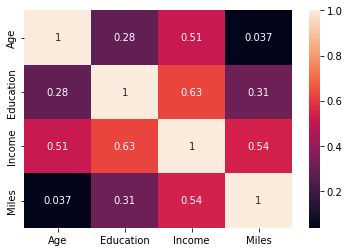

In [20]:
sns.heatmap(df.corr(), annot = True)

In the entire dataset, there is a 51% correlation between Age and Income, a 63% correlation between Education and Income and a 54% correlation between Income and Miles.

<AxesSubplot:>

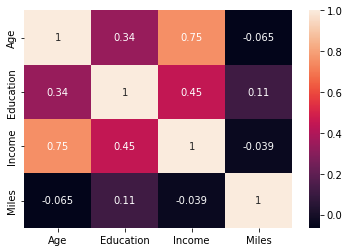

In [21]:
sns.heatmap(df1.corr(), annot = True)

For the treadmill KP281, there is a 75% correlation between Age and Income. There is a negative correlation of -65% between Age and MIles and -39% between Income and Miles.

<AxesSubplot:>

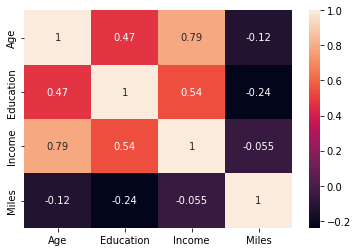

In [22]:
sns.heatmap(df2.corr(), annot = True)

For the treadmill KP481, there is a 79% correlation between Age and Income and a 54% correlation between Education and Income. There is a negative correlation of -12% between Age and Miles and -24% between Education and Miles.

<AxesSubplot:>

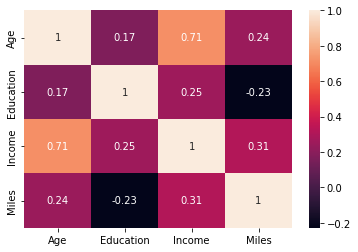

In [23]:
sns.heatmap(df3.corr(), annot = True)

For the treadmill KP781, there is a 71% correlation between Age and Income. There is a negative correlation of -23% between Education and Miles.

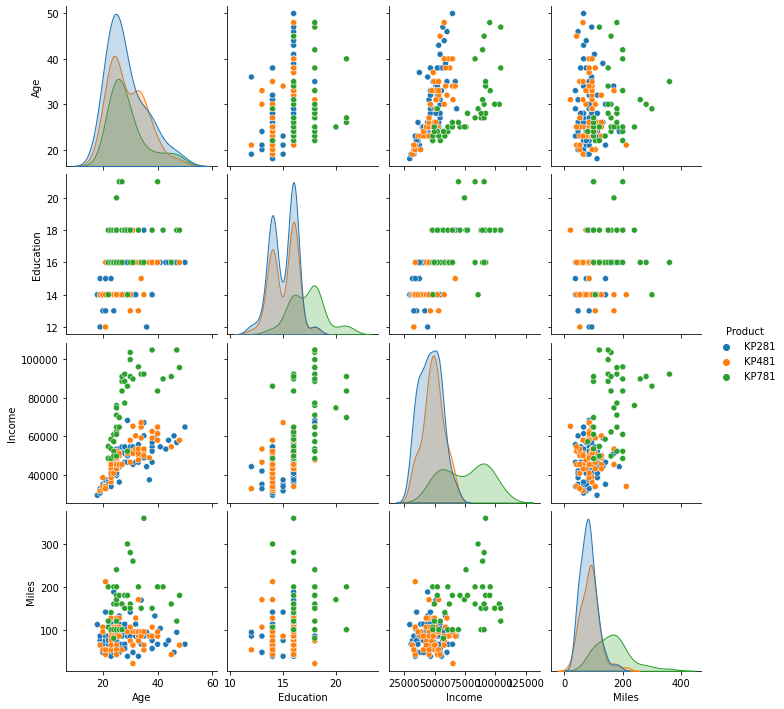

In [24]:
sns.pairplot(df, hue = "Product")

# Inferences

<AxesSubplot:xlabel='Miles', ylabel='Count'>

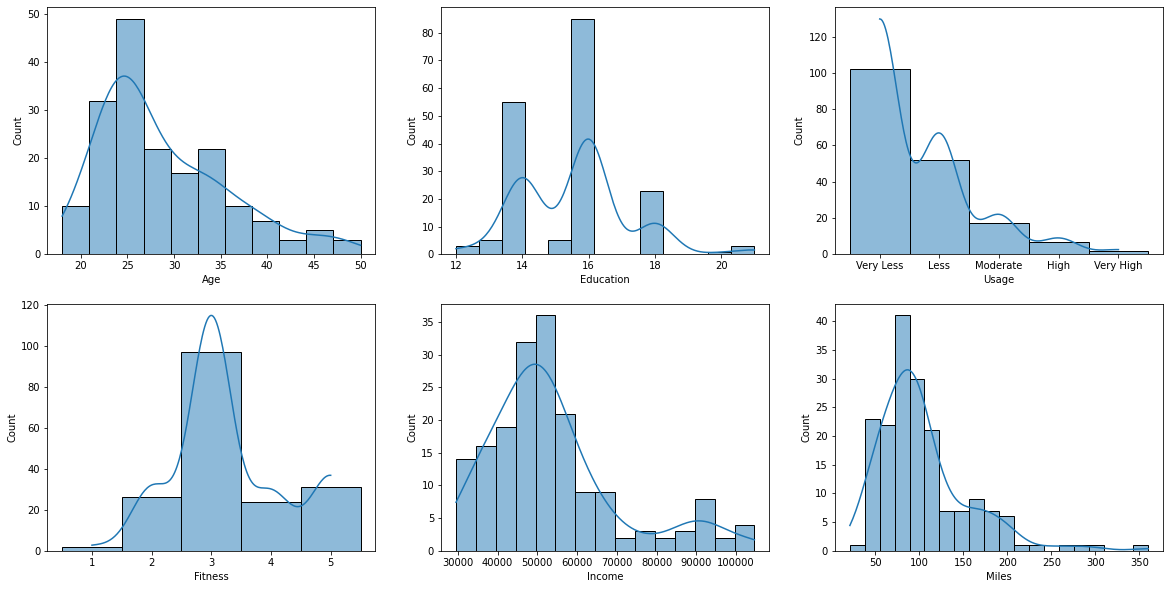

In [25]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
sns.histplot(data=df,x="Age",kde=True,ax=axis[0][0])
sns.histplot(data=df,x="Education",kde=True,ax=axis[0][1])
sns.histplot(data=df,x="Usage",kde=True,ax=axis[0][2])
sns.histplot(data=df,x="Fitness",kde=True,ax=axis[1][0])
sns.histplot(data=df,x="Income",kde=True,ax=axis[1][1])
sns.histplot(data=df,x="Miles",kde=True,ax=axis[1][2])

<AxesSubplot:xlabel='Fitness', ylabel='count'>

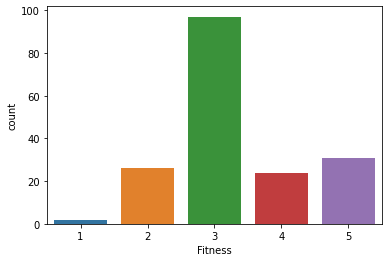

In [26]:
sns.countplot(data = df, x = "Fitness")

Its been observed that Fitness 3 has most number of users

<AxesSubplot:xlabel='Usage', ylabel='count'>

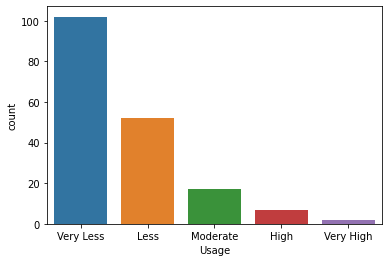

In [27]:
sns.countplot(data = df, x = "Usage")

Maxium number of users use the treadmills in the category "Very Less" i.e, around 2 hours

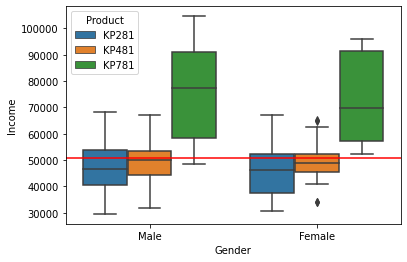

In [28]:
sns.boxplot(x = "Gender", y = "Income", hue = "Product", data = df)
plt.axhline(y = df["Income"].median(),color='red')

Both male and female customers with high incomes prefer the product KP781.

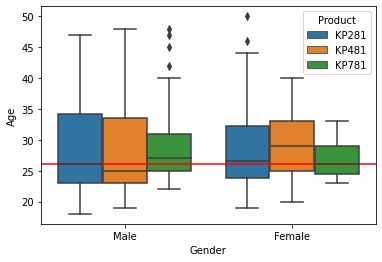

In [29]:
sns.boxplot(x = "Gender", y = "Age", hue = "Product", data = df)
plt.axhline(y = df["Age"].median(),color='red')

Most of the younger male and elder female audience prefer the KP481.

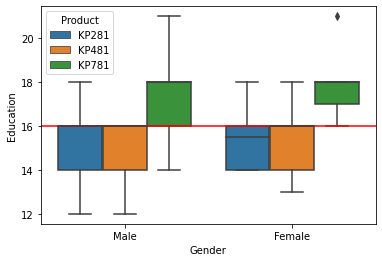

In [30]:
sns.boxplot(x = "Gender", y = "Education", hue = "Product", data = df)
plt.axhline(y = df["Education"].median(),color='red')

Customers with high years of educational years prefer the KP781 while the rest prefer the KP281 and KP481.

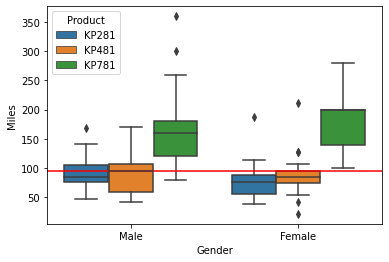

In [31]:
sns.boxplot(x = "Gender", y = "Miles", hue = "Product", data = df)
plt.axhline(y = df["Miles"].median(),color='red')

Customers with high average workout miles prefer the KP781 and customers with workout miles between 50 to 150 prefer KP281 and KP481.

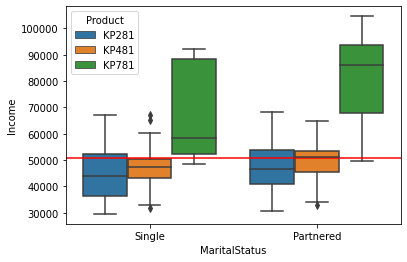

In [32]:
sns.boxplot(x = "MaritalStatus", y = "Income", hue = "Product", data = df)
plt.axhline(y = df["Income"].median(),color='red')

Married customers with high incomes prefer KP781. Most of the single customers with low income prefer the KP281.

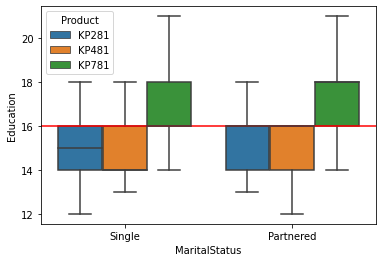

In [33]:
sns.boxplot(x = "MaritalStatus", y = "Education", hue = "Product", data = df)
plt.axhline(y = df["Education"].median(),color='red')

Both single and married customers with high educational years prefer the KP781 while the rest prefer KP281 and KP481.

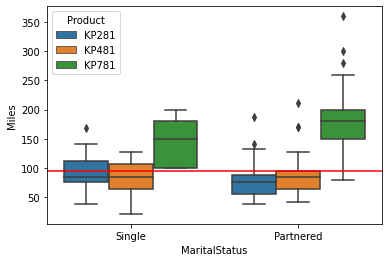

In [34]:
sns.boxplot(x = "MaritalStatus", y = "Miles", hue = "Product", data = df)
plt.axhline(y = df["Miles"].median(),color='red')

Both single and married customers with high average workout miles prefer the KP781 while the rest prefer KP281 and KP481.

# Business Insights

The Product KP281 is mostly used product out of the 3 products

Income and Miles have higher standard deviation i.e more spread of data from mean income and mean Miles

Minimum age of users 18 , while maximum is 50. Howver, the most of the data range around 25-35 . i.e 75% data is lesser than 33

There are 104 males out of 180 data points i.e arond 57% males using the treadmills

The Product KP781 used by users with income greater than 60,000

Lower income people between 40,000 to 55,000 prefer to buy other two products KP281 and KP481

Partnered people are more users and Males are higher than females. On overal KP281 has higher number of users

People with education less than 16 prefer to use KP281 and KP481

# Recommendations

More focus should be given on improving if improvement is needed for KP281 and KP481 as these two SKUs seem to be selling more high revenue generating SKUs compared to KP781

The premium range needs to be kept as is, as it is not selling much, as the upgradation for that KP781 might also cost to company dearly

There should be some sort of reward system for customers who are at fitness level 3 and usage level 3, so that they push themselves

The corporate office spaces need to targeted as well, as most of the peers of the existing customers can be targeted. Since they might fall under same income range, they might be able to afford anyone of the KP281 or KP481